Auxiliary functions

           

In [1]:
from aux import extrapolate_in_time, interpolate_in_space, grad

Advectee and advector initialization

In [2]:
from MPyDATA import ScalarField, VectorField, PeriodicBoundaryCondition
import numpy as np
dx = 1.2
dt = 0.3
nx = 41

#initial state of liquid
# initial_m_value = 0.2
# h_initial = np.full(nx, initial_m_value)
# h_initial[8:20] = np.array([0.8 - (0.02 * i)  for i in range(12)])
h_initial = np.sin(np.arange(nx)/(nx-1)*np.pi)**8
np.testing.assert_array_almost_equal(h_initial, h_initial[::-1])
h_initial[nx//2+1:] = h_initial[0:nx//2][::-1]
print('h initial::', h_initial)
print('symmetrical', (h_initial == h_initial[::-1]).all())

h_old = np.array(h_initial)
h_new = np.array(h_initial)

uh_new = np.zeros(nx)
uh_old = np.zeros(nx)

#initial movement vector
u_initial = np.zeros((nx + 1))
u_old = np.array(u_initial)
u_new = np.array(u_initial)

rhs_old = np.array(h_old)
rsh_old = np.zeros(nx)


from MPyDATA.options import Options
options = Options(n_iters=2, infinite_gauge=False, flux_corrected_transport=False)
halo = options.n_halo

advectee = ScalarField(
    data = h_new,
    halo=halo, 
    boundary_conditions=(PeriodicBoundaryCondition(), )
)

advector = VectorField(
    data = (u_initial,),
    halo=halo,
    boundary_conditions=(PeriodicBoundaryCondition(), )   
)

print('h_new', h_new,'\n')
print('u_new', u_initial,'\n')
print('grad', grad(h_new, dx=dx),'\n')

h initial:: [0.00000000e+00 1.43597337e-09 3.58640665e-07 8.82027300e-06
 8.31493604e-05 4.59957055e-04 1.80457160e-03 5.55495844e-03
 1.42478549e-02 3.16486601e-02 6.25000000e-02 1.11780005e-01
 1.83510601e-01 2.79335603e-01 3.97234603e-01 5.30790043e-01
 6.69345895e-01 7.99193837e-01 9.05647967e-01 9.75603115e-01
 1.00000000e+00 9.75603115e-01 9.05647967e-01 7.99193837e-01
 6.69345895e-01 5.30790043e-01 3.97234603e-01 2.79335603e-01
 1.83510601e-01 1.11780005e-01 6.25000000e-02 3.16486601e-02
 1.42478549e-02 5.55495844e-03 1.80457160e-03 4.59957055e-04
 8.31493604e-05 8.82027300e-06 3.58640665e-07 1.43597337e-09
 0.00000000e+00]
symmetrical True
h_new [0.00000000e+00 1.43597337e-09 3.58640665e-07 8.82027300e-06
 8.31493604e-05 4.59957055e-04 1.80457160e-03 5.55495844e-03
 1.42478549e-02 3.16486601e-02 6.25000000e-02 1.11780005e-01
 1.83510601e-01 2.79335603e-01 3.97234603e-01 5.30790043e-01
 6.69345895e-01 7.99193837e-01 9.05647967e-01 9.75603115e-01
 1.00000000e+00 9.75603115e-01 9.

MPyDATA wrapper

In [3]:
from mpdata import mpdata_wrapper
MPDATA = mpdata_wrapper(advector, advectee, (nx,), options)

Initial state

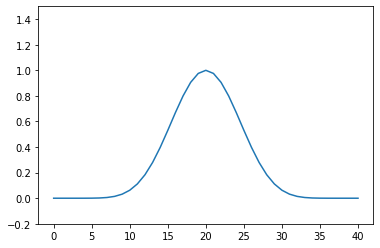

In [4]:
import matplotlib.pyplot as plt

axes = plt.gca()
plt.ylim(-.2, 1.5)
plt.plot(h_new, '-')
plt.show()

Main loop

u_mid symmetrical True
h_new symmetrical True
grad symmetrical True
rhs_new symmetrical True
uh_new ->mpdata True
uh_new ->value_rhs False


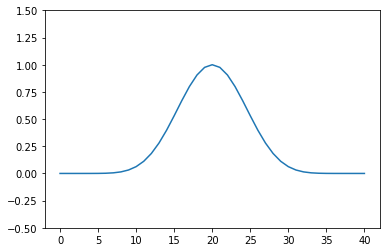

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


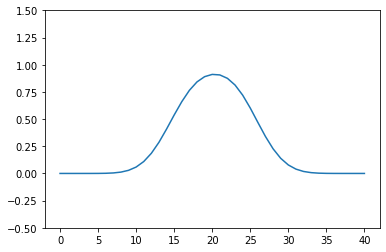

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


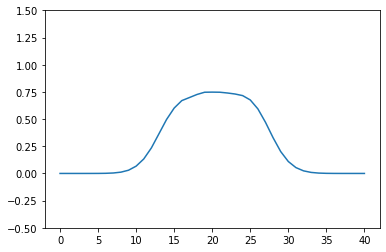

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


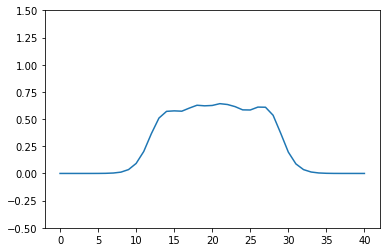

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


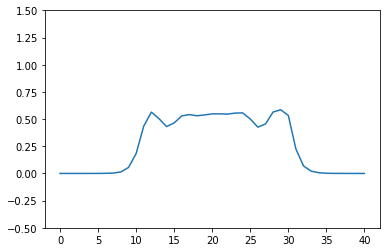

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


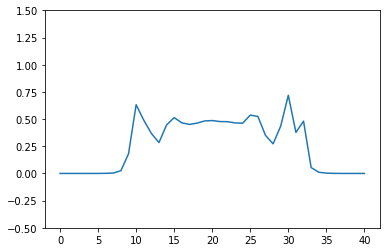

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


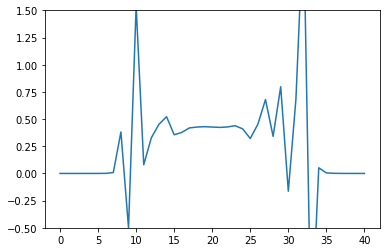

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


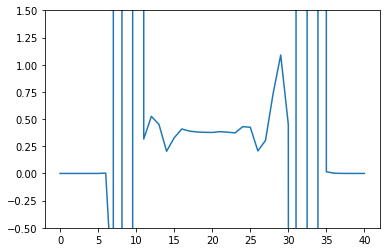

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


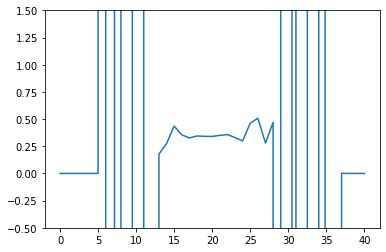

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


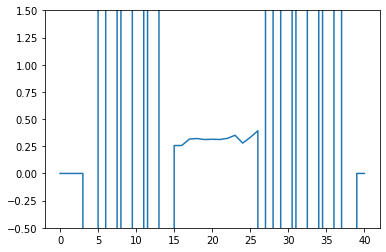

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


/home/white/shallow-water/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  


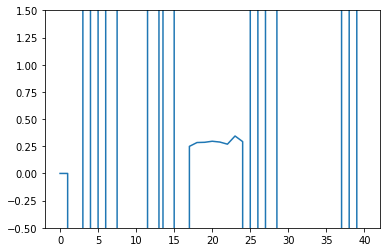

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


/home/white/shallow-water/aux.py:51: RuntimeWarning: invalid value encountered in double_scalars
  u[i] = (result[i-1] + result[i]) / 2.


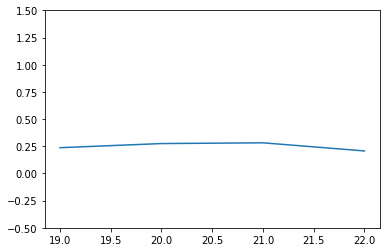

/home/white/shallow-water/aux.py:51: RuntimeWarning: invalid value encountered in double_scalars
  u[i] = (result[i-1] + result[i]) / 2.


u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


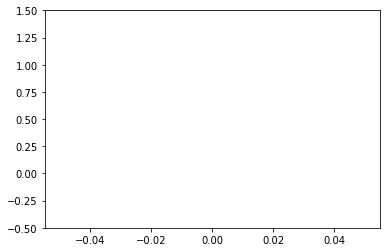

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


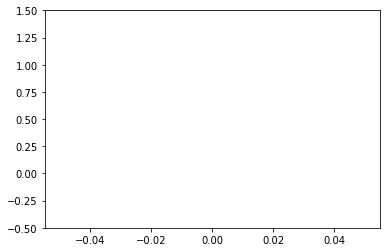

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


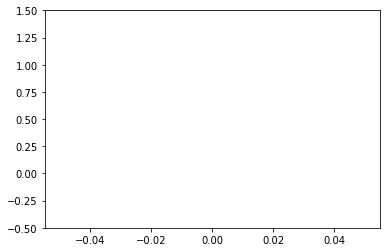

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


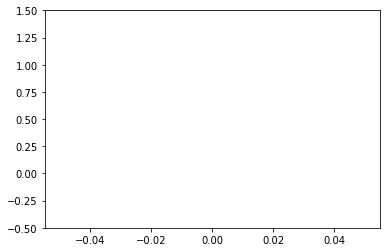

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


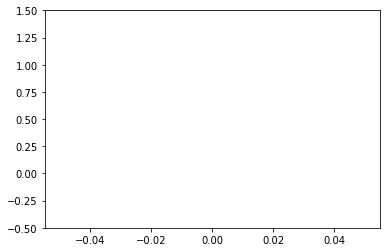

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


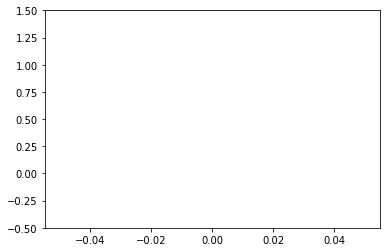

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


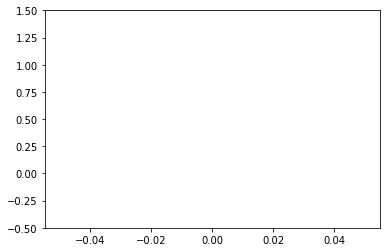

u_mid symmetrical False
h_new symmetrical False
grad symmetrical False
rhs_new symmetrical False
uh_new ->mpdata False
uh_new ->value_rhs False


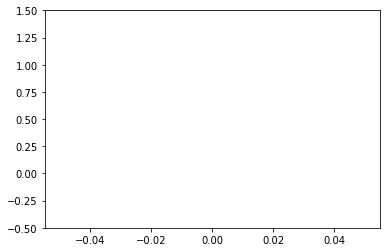

In [5]:
g = 9.8 # m/s^2
for i in range(20):
    u_mid = extrapolate_in_time(interpolate_in_space(uh_new, h_new), interpolate_in_space(uh_old, h_old))
    print('u_mid symmetrical', (u_mid == u_mid[::-1]).all())
    #RHS = 0, mass conservation
    h_new[:] = MPDATA(u_mid, h_old)
    grd = grad(h_new, dx=dx)
    rhs_new = -g *  h_new * grd
    print('h_new symmetrical', (h_new == h_new[::-1]).all())
    print('grad symmetrical', (grd == -grd[::-1]).all())
    print('rhs_new symmetrical', (rhs_new == -rhs_new[::-1]).all())
    #momentum conservation
    
    
#     uh_new[:] = MPDATA(u_mid, uh_old + .5 * dt * rhs_old) + .5 * dt * rhs_new
    value_rhs = 0.5 * dt * rhs_new
    uh_new[:] = MPDATA(u_mid, uh_old + .5 * dt * rhs_old)
    print('uh_new ->mpdata', (uh_new == uh_new[::-1]).all())
    uh_new += value_rhs
    print('uh_new ->value_rhs', (value_rhs == value_rhs[::-1]).all())
    
    #plot figure
    plt.ylim(-.5, 1.5)
    plt.plot(h_new, '-')
    plt.show()
    
    # replace variables
    h_old, h_new = h_new, h_old
    u_old, u_new = u_new, u_old
    rhs_old, rhs_new = rhs_new, rhs_old
    uh_old, uh_new = uh_new, uh_old

    